## Librerías:

In [28]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
import copy
import rasterio
import zipfile

Para los datos Landsat 8 utilizamos las siguientes fórmulas de MNDWI y NDVI:  

*NDWI = (Verde – SWIR)/(Verde + SWIR)*   
**NDWI = (Banda 3 – Banda 6)/(Banda 3 + Banda 6)**  
Los valores del NDWI corresponden a los siguientes rangos:  
0,2 – 1 – Superficie del agua,  
0,0 – 0,2 – Inundación, humedad,  
-0,3 – 0,0 – Sequía moderada, superficies sin agua,  
-1 – -0,3 – Sequía, superficies sin agua  

*NDVI = (Rojo – NIR)/(Rojo + NIR)*  
**NDVI = (Banda 5 - Banda 4)/(Banda 5 + Banda 4)**  


## Carga de imagenes

In [43]:
imagenes = zipfile.ZipFile('Los-Molinos_2023-05-14_6_all_bands.zip', 'r')
imgfile = imagenes.read('2023-05-14.SR_B3.tif')
with zipfile.ZipFile('Los-Molinos_2023-05-14_6_all_bands.zip') as myzip:
    myzip.extractall('Los-Molinos_2023-05-14_6_all_bands/')

In [131]:
# Cargamos la imagen y la dividimos por 255 para normalizarla 
path = 'Los-Molinos_2023-05-14_6_all_bands/'
'''
B3= mpimg.imread(path + '2023-05-14.SR_B3.tif') / 255
B4= mpimg.imread(path + '2023-05-14.SR_B4.tif') / 255
B5= mpimg.imread(path + '2023-05-14.SR_B5.tif') / 255
B6= mpimg.imread(path + '2023-05-14.SR_B6.tif') / 255
'''
B3= rasterio.open(path + '2023-05-14.SR_B3.tif').read(1)
B4= rasterio.open(path + '2023-05-14.SR_B4.tif').read(1)
B5= rasterio.open(path + '2023-05-14.SR_B5.tif').read(1)
B6= rasterio.open(path + '2023-05-14.SR_B6.tif').read(1)


### Exploración de las imágenes

Metadatos

Dimensiones:

In [132]:
# Obtenemos las dimensiones
print("Dimensiones de imagen B3:")
[filas, columnas] = B3.shape
print("        Filas = ", filas, "; Columnas = ", columnas)

print("Dimensiones de imagen B4:")
[filas, columnas] = B4.shape
print("        Filas = ", filas, "; Columnas = ", columnas)

print("Dimensiones de imagen B5:")
[filas, columnas] = B5.shape
print("        Filas = ", filas, "; Columnas = ", columnas)

print("Dimensiones de imagen B6:")
[filas, columnas] = B6.shape
print("        Filas = ", filas, "; Columnas = ", columnas)

# Mostramos qué tipo de objeto son las bandas
print('\nTipo de objeto: ', type(B3), type(B4), type(B5), type(B6))



Dimensiones de imagen B3:
        Filas =  406 ; Columnas =  298
Dimensiones de imagen B4:
        Filas =  406 ; Columnas =  298
Dimensiones de imagen B5:
        Filas =  406 ; Columnas =  298
Dimensiones de imagen B6:
        Filas =  406 ; Columnas =  298

Tipo de objeto:  <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


Sistema de referencia

In [122]:
print(rasterio.open(path + '2023-05-14.SR_B3.tif').crs) ##ME DA NONE: VER BIEN

None


Visualizamos las imagenes de las bandas en tonos de grises

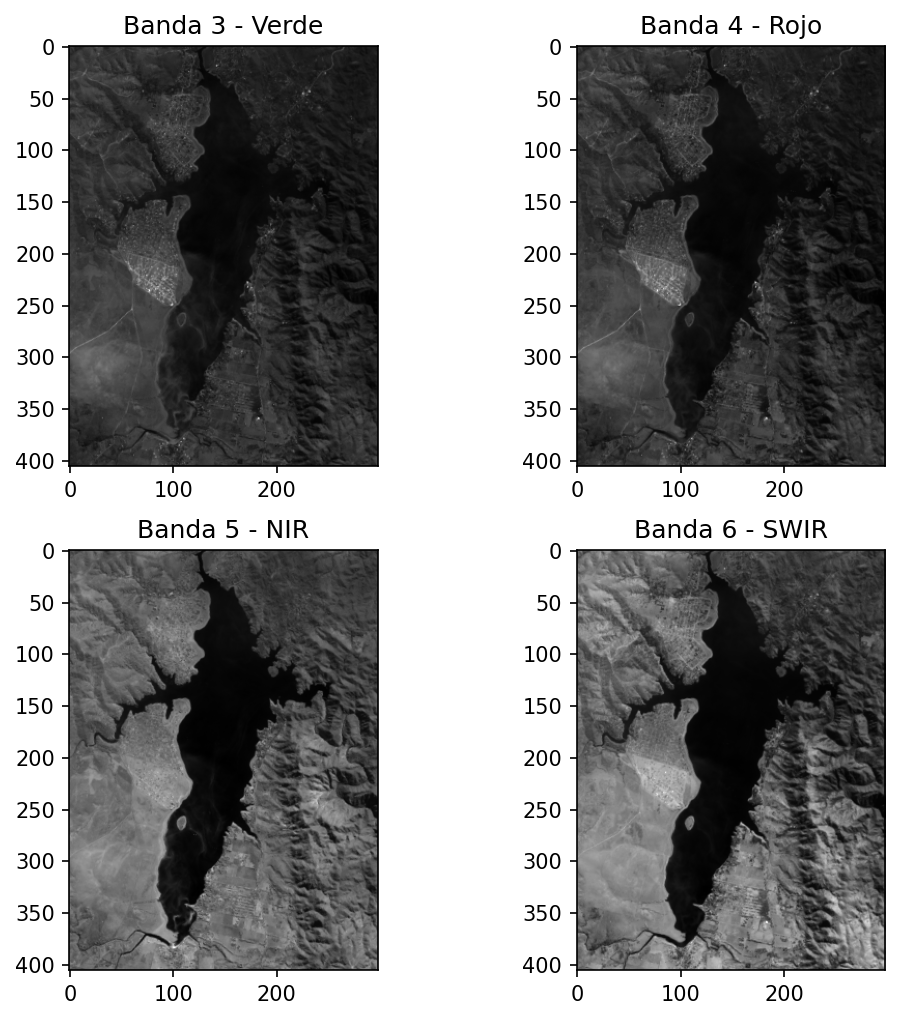

In [133]:
# Armamos la figura
plt.figure(figsize=(8, 8), dpi= 150, facecolor='w', edgecolor='k')
# Banda 3
plt.subplot(2,2,1)
plt.title('Banda 3 - Verde')
plt.imshow(B3, cmap='gray')
# Banda 4
plt.subplot(2,2,2)
plt.title('Banda 4 - Rojo')
plt.imshow(B4, cmap='gray')
# Banda 5
plt.subplot(2,2,3)
plt.title('Banda 5 - NIR')
plt.imshow(B5, cmap='gray')
# Banda 6
plt.subplot(2,2,4)
plt.title('Banda 6 - SWIR')
plt.imshow(B6, cmap='gray')


Otra forma de ver las imágenes usando rasterio

"\n# Armamos la figura\nplt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')\nplt.subplot(2,2,1)\nplt.title('Banda 3 - Verde')\nplot.show(B3)\nplt.subplot(2,2,2)\nplt.title('Banda 4 - Rojo')\nplot.show(B4)\nplt.subplot(2,2,3)\nplt.title('Banda 5 - NIR')\nplot.show(B5)\nplt.subplot(2,2,4)\nplt.title('Banda 6 - SWIR')\nplot.show(B6)\n"

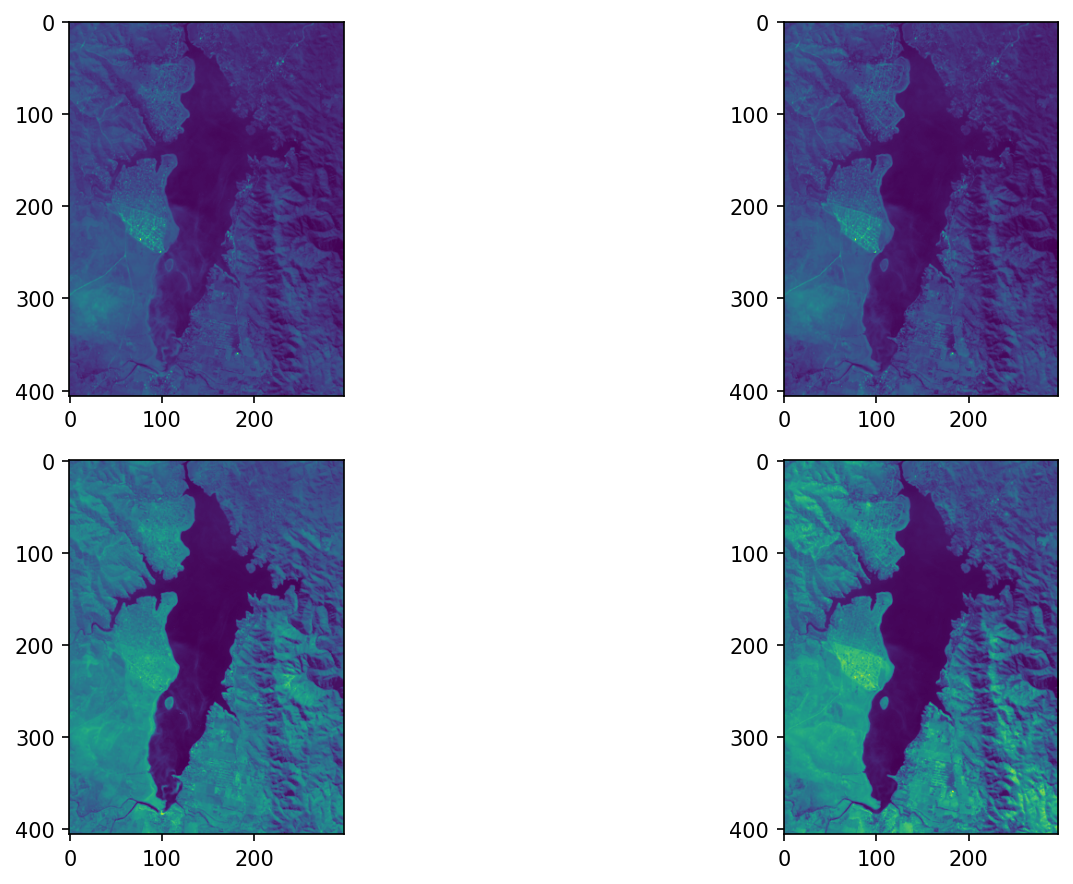

In [134]:
from rasterio import plot
fig, axs = plt.subplots(2,2, figsize=(12, 6), dpi= 150, facecolor='w', edgecolor='k')
axs = axs.ravel()
plot.show(B3, ax=axs[0])
plot.show(B4, ax=axs[1])
plot.show(B5, ax=axs[2])
plot.show(B6, ax=axs[3])
fig.tight_layout()
'''
# Armamos la figura
plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(2,2,1)
plt.title('Banda 3 - Verde')
plot.show(B3)
plt.subplot(2,2,2)
plt.title('Banda 4 - Rojo')
plot.show(B4)
plt.subplot(2,2,3)
plt.title('Banda 5 - NIR')
plot.show(B5)
plt.subplot(2,2,4)
plt.title('Banda 6 - SWIR')
plot.show(B6)
'''

Histograma de las imágenes

Text(0.5, 1.0, 'Banda 6 - SWIR')

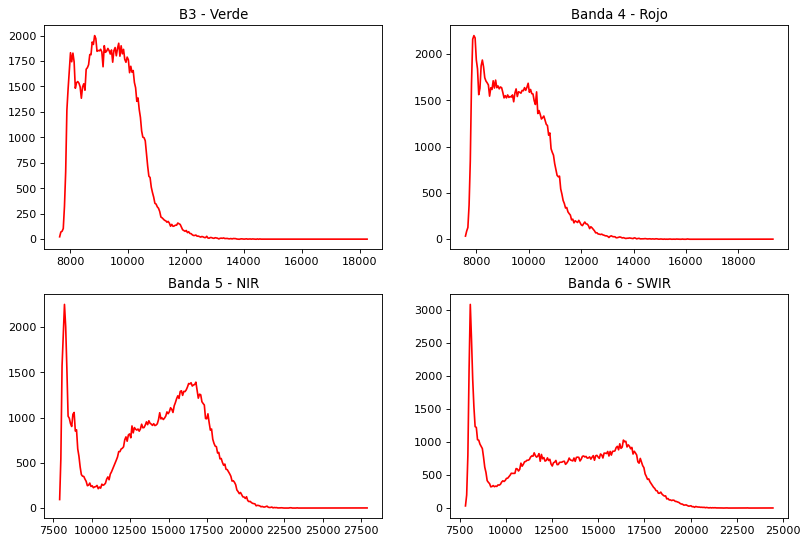

In [135]:
# Histogramas de las bandas
B3_hist, B3_edges = np.histogram(B3, bins=256)
B4_hist, B4_edges = np.histogram(B4, bins=256)
B5_hist, B5_edges = np.histogram(B5, bins=256)
B6_hist, B6_edges = np.histogram(B6, bins=256)
# Creamos la figura
plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
# Subplot 1
plt.subplot(2,2,1)
plt.plot(B3_edges[1:], B3_hist,'r')
plt.title('B3 - Verde')
# Subplot 2
plt.subplot(2,2,2)
plt.plot(B4_edges[1:], B4_hist,'r')
plt.title('Banda 4 - Rojo')
# Subplot 3
plt.subplot(2,2,3)
plt.plot(B5_edges[1:], B5_hist,'r')
plt.title('Banda 5 - NIR')
# Subplot 4
plt.subplot(2,2,4)
plt.plot(B6_edges[1:], B6_hist,'r')
plt.title('Banda 6 - SWIR')


## MNDWI

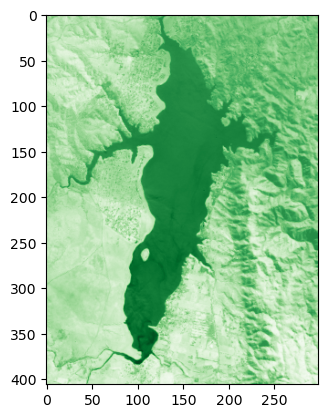

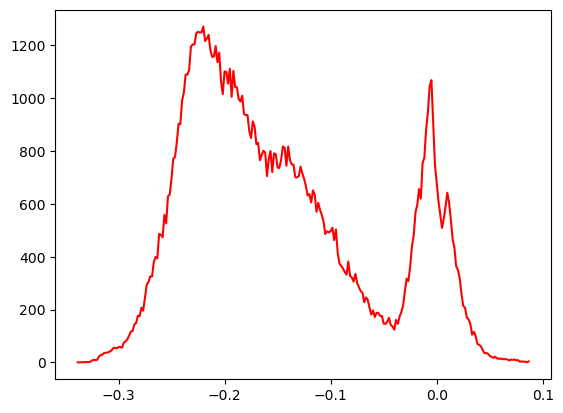

In [136]:
#mdwi calculation, empty cells or nodata cells are reporte as 0
mdwi = np.where(
                (B3+B6)==0.,
                0,
                (B3.astype(float)-B6.astype(float))/(B3.astype(float)+B6.astype(float))
               )
plot.show(mdwi, cmap='Greens')

# Histograma
mdwi_hist, mdwi_edges = np.histogram(mdwi, bins=256)
plt.plot(mdwi_edges[1:], mdwi_hist,'r')
